<a href="https://colab.research.google.com/github/Dongkyu1102/Engineer-Big-Data-Analysis/blob/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B8%B0%EC%82%AC-%EC%A0%9C-1-%EC%9C%A0%ED%98%95/Engineer_Big_Data_Analysis(%EC%A0%9C_1_%EC%9C%A0%ED%98%95).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기


구글드라이브 연동

In [96]:
import pandas as pd
import numpy as np

In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
DATA_PATH = "/content/drive/MyDrive/빅데이터분석기사"

In [99]:
df = pd.read_csv(f"{DATA_PATH}/mtcars.csv")

파일 업로드 방식

In [100]:
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv("mtcars.csv") # pandas에서 csv 파일을 불러오기. 어떤파일? ("mtcars.csv"라는 파일을).
# # df.head()

In [101]:
df.iloc[0]

car     Mazda RX4
mpg          21.0
cyl             6
disp        160.0
hp            110
drat          3.9
wt           2.62
qsec        16.46
vs              0
am              1
gear            4
carb            4
Name: 0, dtype: object

# 제1유형_데이터 다루기

✅ 데이터 다루기 유형
1.	 데이터 타입(object, int, float, bool 등)
2.	 기초통계량(평균, 중앙값, 사분위수, IQR, 표준편차 등)
3.	 데이터 인덱싱,	필터링,	정렬,	변경 등
4.	 결측치,	이상치,	중복값 처리(제거	or	대체)
5.	 데이터	Scaling(데이터 표준화(z),	데이터정규화(min-max))
6.	 데이터 합치기
7.	 날짜/시간 데이터,	index	다루기



##✅	1.	데이터	type
1.	 int	:	정수형(소수점 미포함)
2.	 float	:	실수(소수점 포함)
3.	 object	:	일반적으로 문자열을 나타내는 데이터 타입
4.	 category	:	한정된 범위 내에서 고유한 값을 가지는 데이터 타입(범주형)
5.	 bool	:	참(True)	또는 거짓(False)으로 나타내는 데이터 타입(boolean형)
6.	 datetime	:	날짜와 시간을 타나내는 데이터 타입


In [102]:
#	데이터 타입 확인
df.dtypes

car      object
mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

In [103]:
#	데이터 타입 변경(1개)
df1 = df.copy()
df1 = df1.astype({'cyl':'object'})
print(df1.dtypes)

car      object
mpg     float64
cyl      object
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object


In [104]:
#	데이터 타입 변경(2개 이상)
df1 = df1.astype({'cyl':'int', 'gear':'object'})
df1.dtypes

car      object
mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear     object
carb      int64
dtype: object

In [105]:
df['gear'].head()

0    4
1    4
2    4
3    3
4    3
Name: gear, dtype: int64

In [106]:
df['gear'].value_counts()

3    15
4    12
5     5
Name: gear, dtype: int64

##✅	2.	기초통계량



###1)	중심측도를 나타내는 값(평균,	중앙값,	최빈값)


In [346]:
df = pd.read_csv(f"{DATA_PATH}/mtcars.csv")
df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [108]:
df.shape # 행, 열

(32, 12)

In [109]:
#   평균값 구하기
mpg_mean =  df['mpg'].mean()
print(mpg_mean)

20.090625000000003


In [110]:
#	중앙값 구하기
mpg_median = df['mpg'].median()
print(mpg_median)

19.2


In [111]:
#	최빈값 구하기
mpg_mode = df['cyl'].mode()
print(mpg_mode)

0    8
Name: cyl, dtype: int64


In [112]:
mpg_mode[0]

8

In [113]:
df['cyl'].value_counts()

8    14
4    11
6     7
Name: cyl, dtype: int64

###2)	산포도를 나타내는 값(분산,	표준편차,	IQR,	범위, 왜도, 첨도 등)


In [114]:
#	분산
mpg_var = df['mpg'].var()
print(mpg_var)

36.32410282258064


In [115]:
#	표준편차
mpg_std = df['mpg'].std()
print(mpg_std)

6.026948052089104


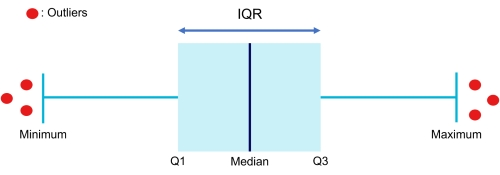

Q1은 1사분위 수로 전체 데이터의 25% 값을 의미하며, Q3은 3사분위 수로 전체 데이터의 75% 값 입니다.

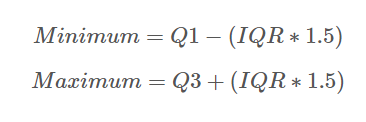

위 식을 이용하여, 만약 입력된 데이터가 Minimum보다 작거나 Maximum보다 크다면 그 데이터를 **이상치**로 판단할 수 있습니다.

In [347]:
#   IQR(사분위수 범위) = Q3 - Q1
Q1 = df['mpg'].quantile(.25)
print(Q1)

Q3 = df['mpg'].quantile(.75)
print(Q3)

IQR = Q3 - Q1
print(IQR)

15.425
22.8
7.375


In [351]:
print(df['mpg'].quantile(.5))
print(df['mpg'].median())

19.2
19.2


####이상치(outlier)

- Tukey Fences:  Q1 - (IQR * 1.5) 미만  or  Q3 + (IQR * 1.5) 초과

In [118]:
outlier_1 =  df['mpg'] < Q1-IQR*1.5
outlier_2 =  df['mpg'] > Q3+IQR*1.5

In [119]:
outlier = df[outlier_1 | outlier_2]
outlier

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.9,1,1,4,1


In [120]:
len(outlier)

1

#### 정상치(normal)

In [121]:
normal_1 = ~(df['mpg'] < Q1-IQR*1.5)
normal_2 = ~(df['mpg'] > Q3+IQR*1.5)

normal = df[normal_1 & normal_2]
normal.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [122]:
len(normal)

31

In [123]:
len(df['mpg'])

32

In [124]:
#   범위(최대-최소)

mpg_max = df['mpg'].max()
mpg_min = df['mpg'].min()

mpg_range = mpg_max - mpg_min
print(mpg_range)

23.5


###3)	분포의 비대칭도


####왜도(Skewness)
- Skewness = 0: 데이터 분포가 대칭
- Skewness > 0: 데이터 분포가 오른쪽 꼬리가 긴 분포
- Skewness < 0: 데이터 분포가 왼쪽 꼬리가 긴 분포

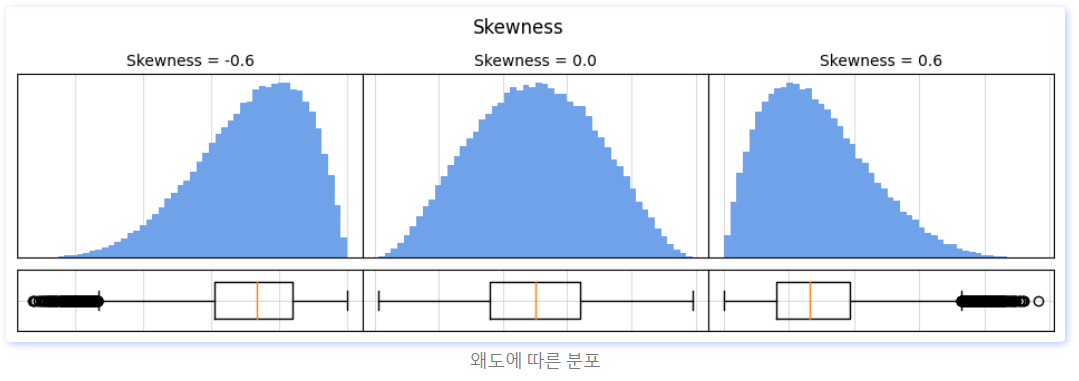

In [125]:
mpg_skew = df['mpg'].skew()
print(mpg_skew)

0.6723771376290805


In [126]:
import seaborn as sns
import plotly.express as px
df_titanic = sns.load_dataset('titanic')

print(df_titanic['age'].skew()) # 왜도의 값이 양수 - 오른쪽 꼬리가 긴 분포
px.histogram(df_titanic['age'])

0.38910778230082704


#### 첨도(Kurtosis)
- Kurtosis = 0: 정규분포와 같은 첨도
- Kurtosis > 0: 정규분포보다 뾰족한 분포
- Kurtosis < 0: 정규분포보다 완만한 분포

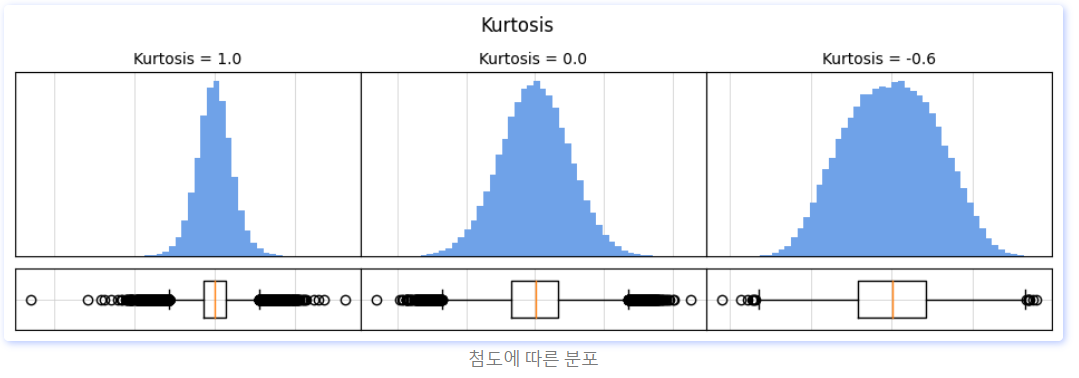

In [127]:
mpg_kurt = df['mpg'].kurt()
print(mpg_kurt)

-0.0220062914240855


In [128]:
#히스토그램 시각화(plotly)
# import plotly.express as px
# px.histogram(df['mpg'])

###4)	기타(합계,	절대값 등)


In [129]:
#	합계
mpg_sum = df['mpg'].sum()
print(mpg_sum)

642.9000000000001


In [130]:
#	절대값 = abs()
print(Q1-Q3)
IQR = abs(Q1-Q3)
IQR

-7.375


7.375

In [131]:
abs(-1235.55)

1235.55

In [132]:
#	데이터 수
len(df['mpg'])

32

In [133]:
#	데이터 컬럼 종류
df['car'].unique()

array(['Mazda RX4', 'Mazda RX4 Wag', 'Datsun 710', 'Hornet 4 Drive',
       'Hornet Sportabout', 'Valiant', 'Duster 360', 'Merc 240D',
       'Merc 230', 'Merc 280', 'Merc 280C', 'Merc 450SE', 'Merc 450SL',
       'Merc 450SLC', 'Cadillac Fleetwood', 'Lincoln Continental',
       'Chrysler Imperial', 'Fiat 128', 'Honda Civic', 'Toyota Corolla',
       'Toyota Corona', 'Dodge Challenger', 'AMC Javelin', 'Camaro Z28',
       'Pontiac Firebird', 'Fiat X1-9', 'Porsche 914-2', 'Lotus Europa',
       'Ford Pantera L', 'Ferrari Dino', 'Maserati Bora', 'Volvo 142E'],
      dtype=object)

###5)	그룹화 하기	(groupby	활용)

- 파이썬 데이터 샘플 불러오기(seaborn 라이브러리)

In [134]:
import seaborn as sns
df_iris = sns.load_dataset('iris')
df_titanic = sns.load_dataset('titanic')

In [135]:
#   iris 데이터
df_iris
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [136]:
df_iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [137]:
#	iris 데이터의 species별로 각 변수의 평균 구해보기
df_iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [138]:
# iris 데이터의 species별로 각 특징(길이, 넓이 등)의 최댓값-최솟값 표시
print(df_iris.groupby('species').max())
print(df_iris.groupby('species').min())

df_iris.groupby('species').max() - df_iris.groupby('species').min()

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa               5.8          4.4           1.9          0.6
versicolor           7.0          3.4           5.1          1.8
virginica            7.9          3.8           6.9          2.5
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa               4.3          2.3           1.0          0.1
versicolor           4.9          2.0           3.0          1.0
virginica            4.9          2.2           4.5          1.4


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,1.5,2.1,0.9,0.5
versicolor,2.1,1.4,2.1,0.8
virginica,3.0,1.6,2.4,1.1


##*✅*	3.	데이터 인덱싱,	필터링,	정렬,	변경 등


In [139]:
df = pd.read_csv(f"{DATA_PATH}/mtcars.csv")
df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


###1)	데이터 인덱싱


In [140]:
# df[] 는 column(열) 을 선택하고
# df.loc[] 는 row(행) 데이터를 가져오게 됩니다. 물론 df.loc[:, ] 을 쓰게 되면 df[] 와 같게 구현이 가능하다.

# label이나 조건표현으로 선택하는 방법 (.loc)
# 행 번호(row number = index 번호)로 선택하는 방법 (.iloc)


# 예제 (cyl이 6 보다 같거나 크며, vs가 0이 아닌 조건을 만족하는 데이터 프레임 중에서 'car', 'cyl', 'vs' 컬럼(열)만 보여줘.)
df.loc[(df['cyl'] >= 6) & ~(df['vs'] == 0) , ['car', 'cyl', 'vs']]

,car,cyl,vs
3,Hornet 4 Drive,6,1
5,Valiant,6,1
9,Merc 280,6,1
10,Merc 280C,6,1


In [141]:
df.loc[3, 'mpg'] # label, 조건으로 행(row) 열(column)을 조회

21.4

In [142]:
df.iloc[3, 1] # 인덱스 번호로 행(row) 열(column)을 조회

21.4

In [143]:
df.loc[:, 'mpg'].head() # 모든 행에서 'mpg' label의 열 조회

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64

In [144]:
df.iloc[:, 1].head() # 모든 행에서 '1번 index' 열 조회  # index는 0부터 시작하므로, '1번 index'는 2번째이다.

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64

In [145]:
df.loc[0:1, ['car', 'mpg', 'cyl', 'disp']] # 행 0번 label부터 1번 label 까지 & 열 조건식

,car,mpg,cyl,disp
0,Mazda RX4,21.0,6,160.0
1,Mazda RX4 Wag,21.0,6,160.0


In [146]:
df.iloc[0:2, 0:4] # 행 0,1 & 열 0,1,2,3

,car,mpg,cyl,disp
0,Mazda RX4,21.0,6,160.0
1,Mazda RX4 Wag,21.0,6,160.0


In [147]:
df[df.loc[:,'car'].str.contains('360')]

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
6,Duster 360,14.3,8,360.0,245,3.21,3.57,15.84,0,0,3,4


In [148]:
#	앞에서	n행 인덱싱
df.head(3)

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [149]:
#	뒤에서	n행 인덱싱
df.tail(3)

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.77,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.78,18.6,1,1,4,2


###2)	열(Columns)	추가/제거


In [150]:
#	열 선택
df.cyl.head()

0    6
1    6
2    4
3    6
4    8
Name: cyl, dtype: int64

In [151]:
#	열 선택
df['cyl'].head()

0    6
1    6
2    4
3    6
4    8
Name: cyl, dtype: int64

In [152]:
#	열 추가
df2 = df.copy()  # (df2 = df 복사는	df가 바뀌면	df2도 바뀜)
df2['new'] = 12345
df2.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,new
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,12345
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,12345
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,12345
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,12345
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,12345


In [153]:
df2['new_2'] = df['gear'] + 100
df2.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,new,new_2
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,12345,104
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,12345,104
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,12345,104
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,12345,103
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,12345,103


In [154]:
#	열 제거
#   df.drop() --- axis=0는 행, axis=1은 열 기준으로 작동.

df.drop([0,1,2,3], axis=0).head(3)

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.44,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.46,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.57,15.84,0,0,3,4


In [155]:
df[~df.index.isin([0,1,2,3])].head(3)

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.44,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.46,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.57,15.84,0,0,3,4


In [156]:
df.drop(['gear', 'carb'], axis=1).head(3)

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1


In [157]:
df.loc[:, ~df.columns.isin(['gear', 'carb'])].head(3)

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1


###3)	데이터 필터링


In [158]:
df = pd.read_csv(f"{DATA_PATH}/mtcars.csv")

In [159]:
#	1개 조건 필터링
#	cyl=4	인 데이터의 수
df[df['cyl']==4]
len(df[df['cyl']==4])

11

In [160]:
#	mpg	가	22	이상인 데이터 수
df[df['mpg']>=22]
df[df['mpg']>=22].sort_values(['mpg'])
len(df[df['mpg']>=22])

9

In [161]:
#	2개 조건 필터링
(df['am']==1) & (df['mpg']>=22)
df[(df['am']==1) & (df['mpg']>=22)].head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1


In [162]:
(df['am']==1) | (df['mpg']>=22)
df[(df['am']==1) | (df['mpg']>=22)].head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [163]:
# 실수하지 않게 변수에 치환하면서 코딩!!

cond1 = df['am']==1
cond2 = df['mpg']>=22

df[cond1 & cond2].head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1


###4)	데이터 정렬


In [164]:
df = pd.read_csv(f"{DATA_PATH}/mtcars.csv")

In [165]:
#   컬럼 정렬
df.sort_values('mpg').head()  # 오름차순: ascending=True / 내림차순: ascending=False

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
23,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4


In [166]:
#   컬럼 빈도수
df.value_counts('gear').head()  # 오름차순: ascending=True / 내림차순: ascending=False

gear
3    15
4    12
5     5
dtype: int64

###5)	데이터 변경(조건문 - np.where)


np.where( 조건, True일 경우 값, False일 경우 값 )
- 이상치를 Max 값이나 Min 값으로 대체할 경우 조건문 활용


In [167]:
df = pd.read_csv(f"{DATA_PATH}/mtcars.csv")

#	hp	변수 값중에서	205가 넘는 값은 205로 처리하고 나머지는 그대로 유지
df['hp'] = np.where(df['hp']>205, 205, df['hp'])
df

df.sort_values('hp', ascending=False).head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
16,Chrysler Imperial,14.7,8,440.0,205,3.23,5.345,17.42,0,0,3,4
30,Maserati Bora,15.0,8,301.0,205,3.54,3.570,14.60,0,1,5,8
28,Ford Pantera L,15.8,8,351.0,205,4.22,3.170,14.50,0,1,5,4
6,Duster 360,14.3,8,360.0,205,3.21,3.570,15.84,0,0,3,4
23,Camaro Z28,13.3,8,350.0,205,3.73,3.840,15.41,0,0,3,4


In [168]:
df = pd.read_csv(f"{DATA_PATH}/mtcars.csv")
#   np.where 조건 여러개

#   기어가 4단 이상이면서, 마력이 15 이상인 것은 1, 그렇지 않으면 0으로 새로운 컬럼에 추가하시오
cond1 = df['gear']>3
cond2 = df['mpg']>15
df['new'] = np.where(cond1 & cond2, 1, 0)
# df['new'] = np.where((df['gear']>3) & (df['mpg']>15)), 1, 0) # 코드 한번에 사용하려면, 소괄호 안의 소괄호 잘 사용해야함!

df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,new
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,0


##✅	4.	결측치,	이상치,	중복값 처리

데이터 불러오기(타이타닉 데이터 세트)
- 종속변수(y)	:	생존여부(0	사망,	1	생존)
- 독립변수(x)	:	pclass, sex, age	등의 탑승자 정보

In [254]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


###1)	결측치 확인 및 처리


In [260]:
#	결측치 확인
df.isnull().sum()
# df.isnull = df.isna 동일

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [261]:
#   결측치 전체 개수
df.isna().sum().sum()

869

In [238]:
#	결측치 확인
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [252]:
#   결측치 제거[dropna, axis=0(행 기준, 디폴트), axis=1(열 기준)]
print(df.shape)

print(df.dropna(axis=0).shape)  # 행 기준
print(df.dropna(axis=1).shape)  # 열 기준 - 네 가지 열(컬럼)에서 결측치가 발생 확인.

(891, 15)
(182, 15)
(891, 11)


In [321]:
#	결측치 대체 (수치형 자료: 평균 or 중앙값)
df = sns.load_dataset('titanic')

df2 = df.copy()
age_median = df2['age'].median()
print(age_median)

df2['age'] = df2['age'].fillna(age_median)
df2.isnull().sum()

28.0


survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [285]:
#	결측치 대체 (범주형 자료: 빈도수)
df2 = df.copy()
df2['embarked'].isnull().sum()

2

In [286]:
df2[df2['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [316]:
cond1 = df2['pclass']==1
cond2 = df2['sex']=='female'
df3 = df2.loc[cond1 & cond2]
df3['embarked'].mode()[0]

'S'

In [322]:
df2['embarked'] = df2['embarked'].fillna(df3['embarked'].mode()[0])
df2.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [342]:
#	결측치 대체 (범주형 자료: 빈도수)
print(df['embark_town'].value_counts())

df2['embark_town'] = df2['embark_town'].fillna('Southampton')
print(df2['embark_town'].value_counts())
df2.isnull().sum()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64
Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64


survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

###2)	이상치 확인 및 처리


####1) Tukey Fences 방식
- Tukey Fences:  Q1 - (IQR * 1.5) 미만  or  Q3 + (IQR * 1.5) 초과

<Axes: >

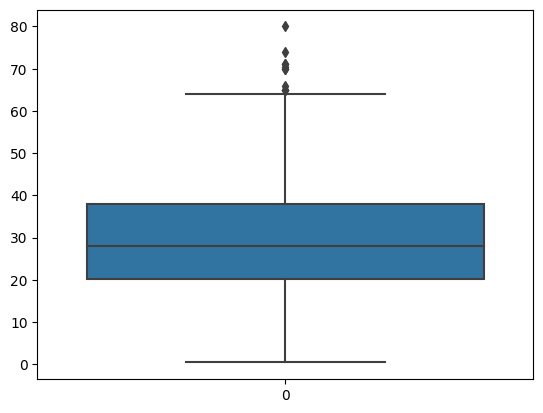

In [384]:
df = sns.load_dataset('titanic')
sns.boxplot(df['age'])

In [385]:
Q1 = df['age'].quantile(.25)
Q3 = df['age'].quantile(.75)
IQR = Q3 - Q1

cond1 = df['age'] < Q1 - 1.5*IQR
cond2 = df['age'] > Q3 + 1.5*IQR
print(Q1 - 1.5*IQR, Q3 + 1.5*IQR)

print(len(df[cond1 | cond2])) # Tukey Fences 기준 이상치 갯수
df[cond1 | cond2]

-6.6875 64.8125
11


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
33,0,2,male,66.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
280,0,3,male,65.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
456,0,1,male,65.0,0,0,26.5500,S,First,man,True,E,Southampton,no,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
672,0,2,male,70.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
745,0,1,male,70.0,1,1,71.0000,S,First,man,True,B,Southampton,no,False


In [388]:
df[~(cond1 | cond2)]['age'].dropna() # 이상치와 결측치 제거한 것 (풀이1)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: age, Length: 703, dtype: float64

In [389]:
#   이상치와 결측치 제외한 것 (풀이2)
cond1 = df['age'] >= Q1 - 1.5*IQR
cond2 = df['age'] <= Q3 + 1.5*IQR

print(len(df[cond1 & cond2]))
df[cond1 & cond2]

703


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


####2) Z-score 방식
- Z-score: *±* 3Z 값을 넘어가는 값

표준정규분포 데이터 표준화
- Z = (개별 값 - 평균)/표준편차


In [398]:
age_mean = df['age'].mean()
age_std = df['age'].std()
z = (df['age'] - age_mean) / age_std

print(len(df[(z < -3) | (z > 3)]))
df[(z < -3) | (z > 3)]

2


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
630,1,1,male,80.0,0,0,30.000,S,First,man,True,A,Southampton,yes,True
851,0,3,male,74.0,0,0,7.775,S,Third,man,True,NaN,Southampton,no,True


###3)	중복값 제거


In [399]:
#	데이터 불러오기
df = sns.load_dataset('titanic')
df.shape

(891, 15)

In [410]:
#   중복 값 조회
df1	=	df.copy()
df1[df1.duplicated()].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
77,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
87,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [411]:
#   중복 값 제거
df1	=	df1.drop_duplicates()
print(df1.shape)

#	(주의!!!) 예제에서는 중복 값이 있어서 제거했지만, 중복값이 나올 수 있는 상황이면 제거할 필요 없음!

(784, 15)


##✅	5.	데이터	scaling
- 데이터 표준화(z-score 표준화 = StandardScaler)
- 데이터 정규화(MinMaxScaler, RobustScaler)



In [ ]:
# fit + transform → fit_transform 사용 가능하나 교차검증에서는 꼭 나눠서 해라!


# scaler = MinMaxScaler() or MinMaxScaler or RobustScaler 1개 선정.

# # 학습 데이터에 대해서 fit(), transform()
# scaler.fit(x_train)
# scaled_x_train = scaler.transform(x_train)

# 테스트 데이터에서는 transform만 사용 !!!
# scaled_x_test = scaler.transform(x_test)

In [446]:
# help('sklearn.preprocessing')
# MinMaxScaler, RobustScaler, StandardScaler help로 확인 가능하나, 암기하라!

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # 암기!!

###1)StandardScaler()
- 각 특성의 평균을 0, 분산을 1로 스케일링 한다.
- 즉, 특성들을 정규분포로 만드는 것입니다.
- Min, Max를 따로 제한하지 않아서 이상치가 큰 데이터에는 취약하기 때문에 꼭 이상치를 제거해줘야 한다.
- 회귀보다 분류에 유용하다.


In [458]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(f'{DATA_PATH}/mtcars.csv')
# scaler에는 2차원 형태의 데이터를 넣어야 함. ex) df[['mpg']]

# 스케일러 선택
st_scaler = StandardScaler()

# 데이터를 통해 스케일링에 필요한 정보 학습. (표준화이므로 평균, 표준편차가 학습된다.)
st_scaler.fit(df[['mpg']])

StandardScaler()

In [459]:
# 스케일링 실행
df['mpg'] = st_scaler.transform(df[['mpg']])
df['mpg'].head()

0    0.153299
1    0.153299
2    0.456737
3    0.220730
4   -0.234427
Name: mpg, dtype: float64

###2)MinMaxScaler()
- 각 특성이 0과 1 사이에 위치하도록 스케일링한다.
- MinMax Scaler는 특성의 최댓값과 최솟값을 기준으로 스케일링 하므로 극단적인 이상치 값에 매우 취약하다.
- 그래서 꼭 이상치를 제거해주는 과정을 거쳐야한다.
- 분류보다 회귀에 유용하다.

In [461]:
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv(f'{DATA_PATH}/mtcars.csv')
# scaler에는 2차원 형태의 데이터를 넣어야 함. ex) df[['mpg']]

# 스케일러 선택
minmax_scaler = MinMaxScaler()

# 데이터를 통해 스케일링에 필요한 정보 학습. (MinMaxScaler는 특성의 최소값과 최대값을 학습)
minmax_scaler.fit(df[['mpg']])

MinMaxScaler()

In [462]:
# 스케일링 실행
df['mpg'] = minmax_scaler.transform(df[['mpg']])
df['mpg'].head()

0    0.451064
1    0.451064
2    0.527660
3    0.468085
4    0.353191
Name: mpg, dtype: float64

###3)RobustScaler()
- 평균과 분산 대신에 중간 값과 사분위 값을 사용합니다.
- 이상치 영향을 최소화할 수 있습니다.
- 분류보다 회귀에 유용하다.

In [467]:
from sklearn.preprocessing import RobustScaler

df = pd.read_csv(f'{DATA_PATH}/mtcars.csv')
# scaler에는 2차원 형태의 데이터를 넣어야 함. ex) df[['mpg']]

# 스케일러 선택
robust_scaler = RobustScaler()

# 데이터를 통해 스케일링에 필요한 정보 학습. (RobustScaler는 중앙값과 IQR을 학습 - 평균과 표준편차에 영향을 덜 받음)
robust_scaler.fit(df[['mpg']])

RobustScaler()

In [468]:
# 스케일링 실행
df['mpg'] = robust_scaler.transform(df[['mpg']])
df['mpg'].head()

0    0.244068
1    0.244068
2    0.488136
3    0.298305
4   -0.067797
Name: mpg, dtype: float64

##✅	6.	데이터 합치기


In [473]:
import seaborn as sns
df = sns.load_dataset('iris')

In [476]:
#   행 방향으로 분할
df_1 = df.loc[0:10,  ]
df_2 = df.loc[11:20, ]

In [484]:
#   행 방향으로 합치기
df_concat = pd.concat([df_1, df_2], axis=0)
df_concat.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
16,5.4,3.9,1.3,0.4,setosa
17,5.1,3.5,1.4,0.3,setosa
18,5.7,3.8,1.7,0.3,setosa
19,5.1,3.8,1.5,0.3,setosa
20,5.4,3.4,1.7,0.2,setosa


In [488]:
# 열 방향으로 분할
df_1 = df.loc[:, 'sepal_length':'sepal_width']
df_2 = df.loc[:, 'petal_length':'species']

In [490]:
# 열 방향으로 합치기
df_concat = pd.concat([df_1, df_2], axis=1)
df_concat.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
